# Logistic Regression

#### Build logistic regression model to understand the customer dataset and also predict whether the user will click on advertisements or not.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

import statsmodels.api as sm

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# import dataset
ad_df = pd.read_csv(r"D:\360digi\DS\Sharath\Logistic_Regression_1\handson\Datasets-Day32-Logistic Regression\advertising.csv")
ad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Daily_Time_ Spent _on_Site  1000 non-null   float64
 1   Age                         1000 non-null   int64  
 2   Area_Income                 1000 non-null   float64
 3   Daily Internet Usage        1000 non-null   float64
 4   Ad_Topic_Line               1000 non-null   object 
 5   City                        1000 non-null   object 
 6   Male                        1000 non-null   int64  
 7   Country                     1000 non-null   object 
 8   Timestamp                   1000 non-null   object 
 9   Clicked_on_Ad               1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [4]:
ad_df.columns

Index(['Daily_Time_ Spent _on_Site', 'Age', 'Area_Income',
       'Daily Internet Usage', 'Ad_Topic_Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked_on_Ad'],
      dtype='object')

In [5]:
ad_df.head()

,Daily_Time_ Spent _on_Site,Age,Area_Income,Daily Internet Usage,Ad_Topic_Line,City,Male,Country,Timestamp,Clicked_on_Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27/03/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/04/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13/03/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10/01/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,3/06/2016 3:36,0


In [6]:
ad_df['Timestamp'].unique()

array(['27/03/2016 0:53', '4/04/2016 1:39', '13/03/2016 20:35',
       '10/01/2016 2:31', '3/06/2016 3:36', '19/05/2016 14:30',
       '28/01/2016 20:59', '7/03/2016 1:40', '18/04/2016 9:33',
       '11/07/2016 1:42', '16/03/2016 20:19', '8/05/2016 8:10',
       '3/06/2016 1:14', '20/04/2016 21:49', '24/03/2016 9:31',
       '9/03/2016 3:41', '30/01/2016 19:20', '2/05/2016 7:00',
       '13/02/2016 7:53', '27/02/2016 4:43', '5/01/2016 7:52',
       '18/03/2016 13:22', '20/05/2016 8:49', '23/03/2016 9:43',
       '13/06/2016 17:27', '27/05/2016 15:25', '8/02/2016 10:46',
       '19/07/2016 8:32', '14/04/2016 5:08', '27/01/2016 12:38',
       '2/07/2016 20:23', '1/03/2016 22:13', '15/07/2016 5:05',
       '14/01/2016 14:00', '15/03/2016 3:12', '12/04/2016 3:26',
       '7/04/2016 15:18', '9/02/2016 5:28', '7/05/2016 17:11',
       '11/03/2016 6:49', '27/04/2016 9:27', '16/04/2016 11:53',
       '8/05/2016 15:38', '8/02/2016 0:23', '11/02/2016 13:26',
       '17/02/2016 13:16', '26/02/201

In [7]:
# Timestamp column is not required for our anaysis. we can ignore it for now.
ad_df.drop('Timestamp', axis = 1, inplace = True)

In [8]:
ad_df.describe()

,Daily_Time_ Spent _on_Site,Age,Area_Income,Daily Internet Usage,Male,Clicked_on_Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Data Preprocessing

In [9]:
ad_df.isna().sum()

Daily_Time_ Spent _on_Site    0
Age                           0
Area_Income                   0
Daily Internet Usage          0
Ad_Topic_Line                 0
City                          0
Male                          0
Country                       0
Clicked_on_Ad                 0
dtype: int64

In [10]:
ad_df.isnull().sum()

Daily_Time_ Spent _on_Site    0
Age                           0
Area_Income                   0
Daily Internet Usage          0
Ad_Topic_Line                 0
City                          0
Male                          0
Country                       0
Clicked_on_Ad                 0
dtype: int64

In [11]:
ad_df.Clicked_on_Ad.unique()

array([0, 1], dtype=int64)

In [12]:
ad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Daily_Time_ Spent _on_Site  1000 non-null   float64
 1   Age                         1000 non-null   int64  
 2   Area_Income                 1000 non-null   float64
 3   Daily Internet Usage        1000 non-null   float64
 4   Ad_Topic_Line               1000 non-null   object 
 5   City                        1000 non-null   object 
 6   Male                        1000 non-null   int64  
 7   Country                     1000 non-null   object 
 8   Clicked_on_Ad               1000 non-null   int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 70.4+ KB


In [13]:
# Seperating input and output variables 
X = pd.DataFrame(ad_df.iloc[:, 0:8])
Y = pd.DataFrame(ad_df.iloc[:, 8])

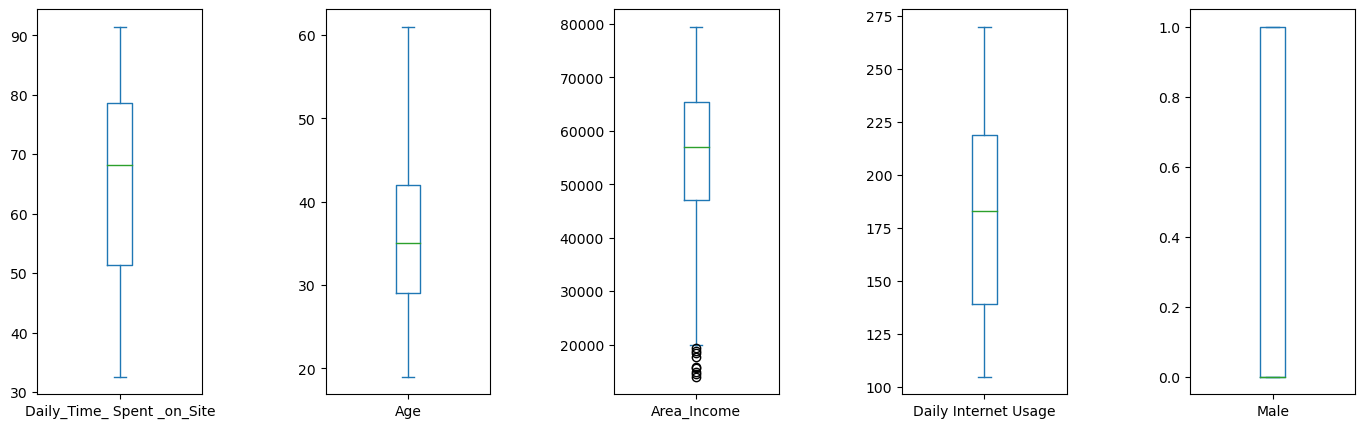

In [14]:
# box plot visualisation
X.plot(kind = 'box', subplots = True, sharey = False, figsize = (17,5))
plt.subplots_adjust(wspace = 0.75)
plt.show()

In [15]:
# Segregating data based on their data types
categorical_features = X.select_dtypes(include = ['object']).columns
categorical_features

Index(['Ad_Topic_Line', 'City', 'Country'], dtype='object')

In [16]:
# Seperating Integer and Float data
numeric_features = X.select_dtypes(exclude = ['object']).columns
numeric_features

Index(['Daily_Time_ Spent _on_Site', 'Age', 'Area_Income',
       'Daily Internet Usage', 'Male'],
      dtype='object')

In [17]:
# Winsorization for outlier treatment
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = list(numeric_features))
winsor

Winsorizer(capping_method='iqr', fold=1.5, tail='both',
           variables=['Daily_Time_ Spent _on_Site', 'Age', 'Area_Income',
                      'Daily Internet Usage', 'Male'])

In [18]:
outlier_pipeline = Pipeline(steps = [('winsor', winsor)])
outlier_pipeline

Pipeline(steps=[('winsor',
                 Winsorizer(capping_method='iqr', fold=1.5, tail='both',
                            variables=['Daily_Time_ Spent _on_Site', 'Age',
                                       'Area_Income', 'Daily Internet Usage',
                                       'Male']))])

In [19]:
preprocessor = ColumnTransformer(transformers = [('wins', outlier_pipeline, numeric_features)])
print(preprocessor)

ColumnTransformer(transformers=[('wins',
                                 Pipeline(steps=[('winsor',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             tail='both',
                                                             variables=['Daily_Time_ '
                                                                        'Spent '
                                                                        '_on_Site',
                                                                        'Age',
                                                                        'Area_Income',
                                                                        'Daily '
                                                                        'Internet '
                                                                        'Usage',
       

In [20]:
clean = preprocessor.fit(X)
clean

ColumnTransformer(transformers=[('wins',
                                 Pipeline(steps=[('winsor',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             tail='both',
                                                             variables=['Daily_Time_ '
                                                                        'Spent '
                                                                        '_on_Site',
                                                                        'Age',
                                                                        'Area_Income',
                                                                        'Daily '
                                                                        'Internet '
                                                                        'Usage',
                                                                        'Male']))]),
                                 Index(['Daily_Time_ Spent _on_Site', 'Age', 'Area_Income',
       'Daily Internet Usage', 'Male'],
      dtype='object'))])

In [21]:
cleandata1 = pd.DataFrame(clean.transform(X), columns = numeric_features)
cleandata1.head()

,Daily_Time_ Spent _on_Site,Age,Area_Income,Daily Internet Usage,Male
0,68.95,35.0,61833.90,256.09,0.0
1,80.23,31.0,68441.85,193.77,1.0
2,69.47,26.0,59785.94,236.50,0.0
3,74.15,29.0,54806.18,245.89,1.0
4,68.37,35.0,73889.99,225.58,0.0


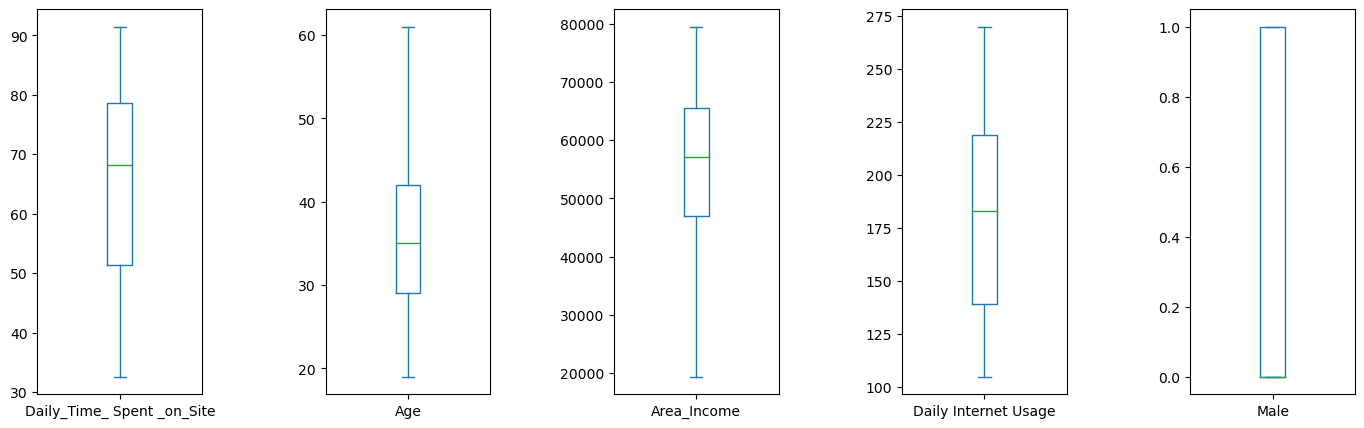

In [22]:
# box plot visualisation
cleandata1.plot(kind = 'box', subplots = True, sharey = False, figsize = (17,5))
plt.subplots_adjust(wspace = 0.75)
plt.show()

In [23]:
cleandata1.describe()

,Daily_Time_ Spent _on_Site,Age,Area_Income,Daily Internet Usage,Male
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,65.000200,36.009000,55025.321364,180.000100,0.481000
std,15.853615,8.785562,13343.228619,43.902339,0.499889
min,32.600000,19.000000,19373.553750,104.780000,0.000000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000
max,91.430000,61.000000,79484.800000,269.960000,1.000000


In [24]:
## Scaling with MinMaxScaler
scale_pipeline = Pipeline([('scale', MinMaxScaler())])

scale_columntransfer = ColumnTransformer([('scale', scale_pipeline, numeric_features)]) # Skips the transformations for remaining columns

scale = scale_columntransfer.fit(cleandata1)

In [25]:
scaled_data = pd.DataFrame(scale.transform(cleandata1), columns = numeric_features)
scaled_data.describe()

,Daily_Time_ Spent _on_Site,Age,Area_Income,Daily Internet Usage,Male
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.550743,0.404976,0.593096,0.455383,0.481000
std,0.269482,0.209180,0.221976,0.265785,0.499889
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.318885,0.238095,0.460118,0.206139,0.000000
50%,0.605388,0.380952,0.626151,0.474331,0.000000
75%,0.781022,0.547619,0.766863,0.690232,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Daily_Time_ Spent _on_Site  1000 non-null   float64
 1   Age                         1000 non-null   int64  
 2   Area_Income                 1000 non-null   float64
 3   Daily Internet Usage        1000 non-null   float64
 4   Ad_Topic_Line               1000 non-null   object 
 5   City                        1000 non-null   object 
 6   Male                        1000 non-null   int64  
 7   Country                     1000 non-null   object 
dtypes: float64(3), int64(2), object(3)
memory usage: 62.6+ KB


### Categorical columns have very large number of unique values and by encoding the 3 columns using get_dummies or OneHotEncoding, around 2200 columns get generated. 

In [27]:
X1 = X[['Ad_Topic_Line', 'City', 'Country']]

In [28]:
X1

,Ad_Topic_Line,City,Country
0,Cloned 5thgeneration orchestration,Wrightburgh,Tunisia
1,Monitored national standardization,West Jodi,Nauru
2,Organic bottom-line service-desk,Davidton,San Marino
3,Triple-buffered reciprocal time-frame,West Terrifurt,Italy
4,Robust logistical utilization,South Manuel,Iceland
...,...,...,...
995,Fundamental modular algorithm,Duffystad,Lebanon
996,Grass-roots cohesive monitoring,New Darlene,Bosnia and Herzegovina
997,Expanded intangible solution,South Jessica,Mongolia
998,Proactive bandwidth-monitored policy,West Steven,Guatemala


In [30]:
#one_hot = pd.get_dummies(X1, prefix=["Ad_",'City_','Country_'], drop_first=True)

In [31]:
#one_hot.shape

(1000, 2203)

In [32]:
#one_hot

,Ad__Adaptive asynchronous attitude,Ad__Adaptive context-sensitive application,Ad__Adaptive contextually-based methodology,Ad__Adaptive demand-driven knowledgebase,Ad__Adaptive uniform capability,Ad__Advanced 24/7 productivity,Ad__Advanced 5thgeneration capability,Ad__Advanced didactic conglomeration,Ad__Advanced disintermediate data-warehouse,Ad__Advanced exuding conglomeration,...,Country__Uruguay,Country__Uzbekistan,Country__Vanuatu,Country__Venezuela,Country__Vietnam,Country__Wallis and Futuna,Country__Western Sahara,Country__Yemen,Country__Zambia,Country__Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
#final_data = pd.concat([scaled_data, one_hot], axis = 1)  # concatenated data will have new sequential index
#final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 2208 entries, Daily_Time_ Spent _on_Site to Country__Zimbabwe
dtypes: float64(5), uint8(2203)
memory usage: 2.1 MB


In [34]:
## Encoding
# Categorical features
encoding_pipeline = Pipeline([('onehot', OneHotEncoder())])

preprocess_pipeline = ColumnTransformer([('categorical', encoding_pipeline, categorical_features)])

clean =  preprocess_pipeline.fit(X)

In [35]:
clean.transform(X)

<1000x2206 sparse matrix of type '<class 'numpy.float64'>'
	with 3000 stored elements in Compressed Sparse Row format>

In [36]:
encode_data = pd.DataFrame(clean.transform(X).todense())
encode_data

,0,1,2,3,4,5,6,7,8,9,...,2196,2197,2198,2199,2200,2201,2202,2203,2204,2205
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
# To get feature names for Categorical columns after Onehotencoding 
encode_data.columns = clean.get_feature_names_out(input_features = X.columns)
encode_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 2206 entries, categorical__Ad_Topic_Line_Adaptive 24hour Graphic Interface to categorical__Country_Zimbabwe
dtypes: float64(2206)
memory usage: 16.8 MB


In [38]:
X[categorical_features].columns

Index(['Ad_Topic_Line', 'City', 'Country'], dtype='object')

In [39]:
X.columns

Index(['Daily_Time_ Spent _on_Site', 'Age', 'Area_Income',
       'Daily Internet Usage', 'Ad_Topic_Line', 'City', 'Male', 'Country'],
      dtype='object')

In [40]:
clean_data = pd.concat([scaled_data, encode_data], axis = 1)  # concatenated data will have new sequential index
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 2211 entries, Daily_Time_ Spent _on_Site to categorical__Country_Zimbabwe
dtypes: float64(2211)
memory usage: 16.9 MB


In [41]:
clean_data.head()

,Daily_Time_ Spent _on_Site,Age,Area_Income,Daily Internet Usage,Male,categorical__Ad_Topic_Line_Adaptive 24hour Graphic Interface,categorical__Ad_Topic_Line_Adaptive asynchronous attitude,categorical__Ad_Topic_Line_Adaptive context-sensitive application,categorical__Ad_Topic_Line_Adaptive contextually-based methodology,categorical__Ad_Topic_Line_Adaptive demand-driven knowledgebase,...,categorical__Country_Uruguay,categorical__Country_Uzbekistan,categorical__Country_Vanuatu,categorical__Country_Venezuela,categorical__Country_Vietnam,categorical__Country_Wallis and Futuna,categorical__Country_Western Sahara,categorical__Country_Yemen,categorical__Country_Zambia,categorical__Country_Zimbabwe
0,0.617882,0.380952,0.706363,0.916031,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.809621,0.285714,0.816291,0.538746,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.626721,0.166667,0.672293,0.797433,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.706272,0.238095,0.589451,0.854280,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.608023,0.380952,0.906926,0.731323,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
clean_data.describe()

,Daily_Time_ Spent _on_Site,Age,Area_Income,Daily Internet Usage,Male,categorical__Ad_Topic_Line_Adaptive 24hour Graphic Interface,categorical__Ad_Topic_Line_Adaptive asynchronous attitude,categorical__Ad_Topic_Line_Adaptive context-sensitive application,categorical__Ad_Topic_Line_Adaptive contextually-based methodology,categorical__Ad_Topic_Line_Adaptive demand-driven knowledgebase,...,categorical__Country_Uruguay,categorical__Country_Uzbekistan,categorical__Country_Vanuatu,categorical__Country_Venezuela,categorical__Country_Vietnam,categorical__Country_Wallis and Futuna,categorical__Country_Western Sahara,categorical__Country_Yemen,categorical__Country_Zambia,categorical__Country_Zimbabwe
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.550743,0.404976,0.593096,0.455383,0.481000,0.001000,0.001000,0.001000,0.001000,0.001000,...,0.005000,0.002000,0.006000,0.007000,0.003000,0.004000,0.007000,0.003000,0.004000,0.006000
std,0.269482,0.209180,0.221976,0.265785,0.499889,0.031623,0.031623,0.031623,0.031623,0.031623,...,0.070569,0.044699,0.077266,0.083414,0.054717,0.063151,0.083414,0.054717,0.063151,0.077266
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.318885,0.238095,0.460118,0.206139,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.605388,0.380952,0.626151,0.474331,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.781022,0.547619,0.766863,0.690232,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### By using these encoded categorical columns in Logit function, it did not give any meaningful insights. So we will not consider these columns for regression analysis.

In [43]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Clicked_on_Ad  1000 non-null   int64
dtypes: int64(1)
memory usage: 7.9 KB


In [44]:
# Correlation Analysis on Original Data
orig_df_cor = ad_df.corr()
orig_df_cor

,Daily_Time_ Spent _on_Site,Age,Area_Income,Daily Internet Usage,Male,Clicked_on_Ad
Daily_Time_ Spent _on_Site,1.000000,-0.331513,0.310954,0.518658,-0.018951,-0.748117
Age,-0.331513,1.000000,-0.182605,-0.367209,-0.021044,0.492531
Area_Income,0.310954,-0.182605,1.000000,0.337496,0.001322,-0.476255
Daily Internet Usage,0.518658,-0.367209,0.337496,1.000000,0.028012,-0.786539
Male,-0.018951,-0.021044,0.001322,0.028012,1.000000,-0.038027
Clicked_on_Ad,-0.748117,0.492531,-0.476255,-0.786539,-0.038027,1.000000


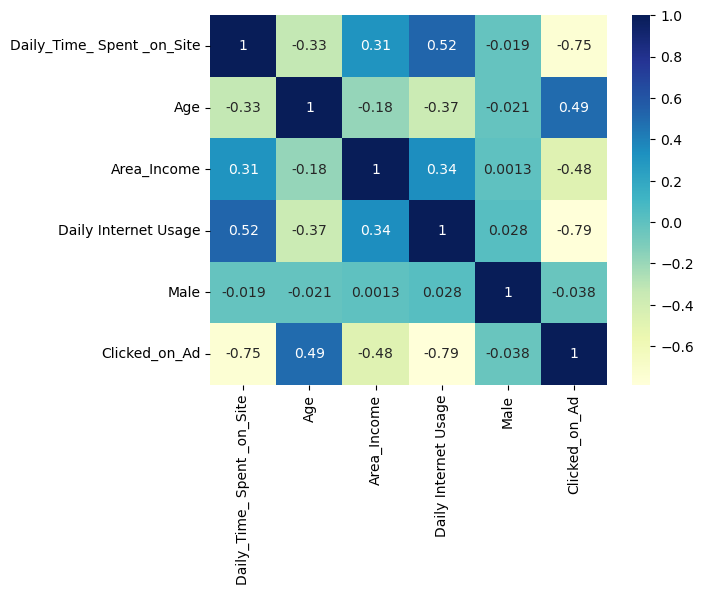

In [45]:
# Heatmap
dataplot = sns.heatmap(orig_df_cor, annot = True, cmap = "YlGnBu")

### Applying Regression without the categorical features

# Logistic Regression

In [46]:
### Statsmodel 
# Building the model and fitting the data
logit_model = sm.Logit(Y, scaled_data).fit()

Optimization terminated successfully.
         Current function value: 0.247186
         Iterations 8


In [47]:
# Summary
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Clicked_on_Ad   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      995
Method:                           MLE   Df Model:                            4
Date:                Tue, 21 Mar 2023   Pseudo R-squ.:                  0.6434
Time:                        23:19:04   Log-Likelihood:                -247.19
converged:                       True   LL-Null:                       -693.15
Covariance Type:            nonrobust   LLR p-value:                9.367e-192
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Daily_Time_ Spent _on_Site    -3.6287      0.469     -7.736      0.000      -4.548      -2.709
Age                            9.6350      0.690     13.974      0.000       8.284      10.986
Area_Income                    0.3653      0.447      0.817      0.414      -0.511       1.242
Daily Internet Usage          -5.3610      0.541     -9.905      0.000      -6.422      -4.300
Male                           0.6075      0.235      2.583      0.010       0.147       1.068
==============================================================================================
"""

In [48]:
logit_model.summary2() # for AIC

<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                  Logit              Pseudo R-squared:   0.643      
Dependent Variable:     Clicked_on_Ad      AIC:                504.3711   
Date:                   2023-03-21 23:19   BIC:                528.9099   
No. Observations:       1000               Log-Likelihood:     -247.19    
Df Model:               4                  LL-Null:            -693.15    
Df Residuals:           995                LLR p-value:        9.3668e-192
Converged:              1.0000             Scale:              1.0000     
No. Iterations:         8.0000                                            
--------------------------------------------------------------------------
                            Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------------
Daily_Time_ Spent _on_Site -3.6287   0.4691 -7.7360 0.0000 -4.5481 -2.7094
Age                         9.6350   0.6895 13.9736 0.0000  8.2836 10.9864
Area_Income                 0.3653   0.4472  0.8168 0.4140 -0.5112  1.2419
Daily Internet Usage       -5.3610   0.5413 -9.9048 0.0000 -6.4218 -4.3002
Male                        0.6075   0.2352  2.5829 0.0098  0.1465  1.0684
==========================================================================

"""

In [49]:
# Prediction
pred = logit_model.predict(scaled_data)
pred  # Probabilities

0      0.038256
1      0.102698
2      0.009033
3      0.017536
4      0.106671
         ...   
995    0.082264
996    0.991429
997    0.998355
998    0.018381
999    0.184889
Length: 1000, dtype: float64

In [50]:
# ROC Curve to identify the appropriate cutoff value
fpr, tpr, thresholds = roc_curve(Y.Clicked_on_Ad, pred)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.4307151071242357

In [51]:
auc = metrics.auc(fpr, tpr)
print("Area under the ROC curve : %f" % auc)

Area under the ROC curve : 0.961400


In [52]:
# Filling all the cells with zeroes
scaled_data["pred"] = np.zeros(1000)

In [53]:
# taking threshold value and above the prob value will be treated as correct value 
scaled_data.loc[pred > optimal_threshold, "pred"] = 1

In [54]:
# Confusion Matrix
confusion_matrix(scaled_data.pred, Y.Clicked_on_Ad)

array([[470,  59],
       [ 30, 441]], dtype=int64)

In [55]:
# Accuracy score of the model
print('Test accuracy = ', accuracy_score(scaled_data.pred, Y.Clicked_on_Ad))


Test accuracy =  0.911


In [56]:
# Classification report
classification = classification_report(scaled_data["pred"], Y)
print(classification)

              precision    recall  f1-score   support

         0.0       0.94      0.89      0.91       529
         1.0       0.88      0.94      0.91       471

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000



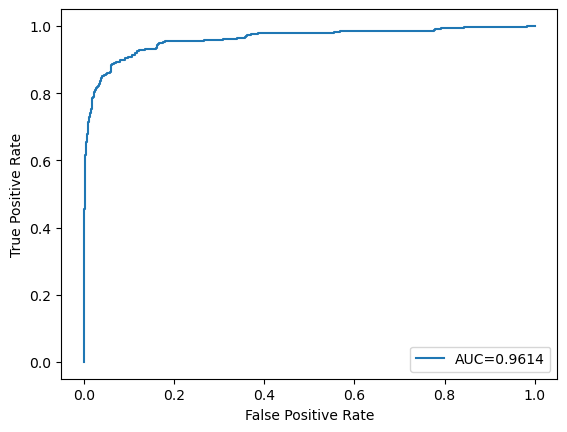

In [57]:
### PLOT FOR ROC
plt.plot(fpr, tpr, label = "AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 4)
plt.show()

In [58]:
scaled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Daily_Time_ Spent _on_Site  1000 non-null   float64
 1   Age                         1000 non-null   float64
 2   Area_Income                 1000 non-null   float64
 3   Daily Internet Usage        1000 non-null   float64
 4   Male                        1000 non-null   float64
 5   pred                        1000 non-null   float64
dtypes: float64(6)
memory usage: 47.0 KB


In [59]:
# Model evaluation - Data Split

In [60]:

x_train, x_test, y_train, y_test = train_test_split (scaled_data.iloc[:, :5], Y, 
                                                     test_size = 0.2, 
                                                     random_state = 0,
                                                     stratify = Y)

In [61]:
x_train.shape

(800, 5)

In [62]:
x_test.shape

(200, 5)

In [63]:
# Fitting Logistic Regression to the training set  
logisticmodel = sm.Logit(y_train, x_train).fit()

Optimization terminated successfully.
         Current function value: 0.226005
         Iterations 8


In [64]:
# Evaluate on train data
y_pred_train = logisticmodel.predict(x_train)  
y_pred_train


600    0.966426
737    0.994244
33     0.012776
519    0.987145
341    0.989482
         ...   
622    0.999436
682    0.977169
357    0.980840
918    0.062867
342    0.034310
Length: 800, dtype: float64

In [65]:
# Metrics
# Filling all the cells with zeroes
y_train["pred"] = np.zeros(800)

In [66]:
# taking threshold value and above the prob value will be treated as correct value 
y_train.loc[pred > optimal_threshold, "pred"] = 1

In [67]:
auc = metrics.roc_auc_score(y_train["Clicked_on_Ad"], y_pred_train)
print("Area under the ROC curve : %f" % auc)

Area under the ROC curve : 0.968850


In [68]:
classification_train = classification_report(y_train["pred"], y_train["Clicked_on_Ad"])
print(classification_train)

              precision    recall  f1-score   support

         0.0       0.95      0.89      0.92       428
         1.0       0.89      0.95      0.92       372

    accuracy                           0.92       800
   macro avg       0.92      0.92      0.92       800
weighted avg       0.92      0.92      0.92       800



In [69]:
# confusion matrix 
confusion_matrix(y_train["pred"], y_train["Clicked_on_Ad"])

array([[382,  46],
       [ 18, 354]], dtype=int64)

In [70]:
# Accuracy score of the model
print('Train accuracy = ', accuracy_score(y_train["pred"], y_train["Clicked_on_Ad"]))


Train accuracy =  0.92


In [71]:
# Validate on Test data
y_pred_test = logisticmodel.predict(x_test)  
y_pred_test

486    0.714781
178    0.874196
368    0.126871
360    0.925613
422    0.959305
         ...   
852    0.994404
352    0.013979
347    0.997398
481    0.495841
349    0.013070
Length: 200, dtype: float64

In [72]:
# Filling all the cells with zeroes
y_test["y_pred_test"] = np.zeros(200)

In [73]:
# Capturing the prediction binary values
y_test.loc[y_pred_test > optimal_threshold, "y_pred_test"] = 1


In [74]:
# classification report
classification1 = classification_report(y_test["y_pred_test"], y_test["Clicked_on_Ad"])
print(classification1)

              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87       100
         1.0       0.87      0.87      0.87       100

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200



In [75]:
# confusion matrix 
confusion_matrix(y_test["y_pred_test"], y_test["Clicked_on_Ad"])


array([[87, 13],
       [13, 87]], dtype=int64)

In [76]:
# Accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test["y_pred_test"], y_test["Clicked_on_Ad"]))


Test accuracy =  0.87
